In [2]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../../Data_Sets/p2/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
from IPython import display
from ClassPerceptron import Perceptron
from sklearn import preprocessing
import grafica as gr

# Ejercicio 1

In [3]:
data_hawks = pd.read_csv(DATOS_DIR + "hawks.csv",sep=";", encoding="latin1")
#quiero ver los tipos de datos que hay en cada columna
data_hawks.dtypes
print(data_hawks.columns.tolist())


['Año', 'Especie', 'Ala', 'Peso', 'Cola', 'Hallux']


## a) 
 Calcule la correlación lineal entre los atributos Ala y Cola. Indique la intensidad de la correlación (no hay correlación/débil/fuerte) y el tipo (positiva/negativa)

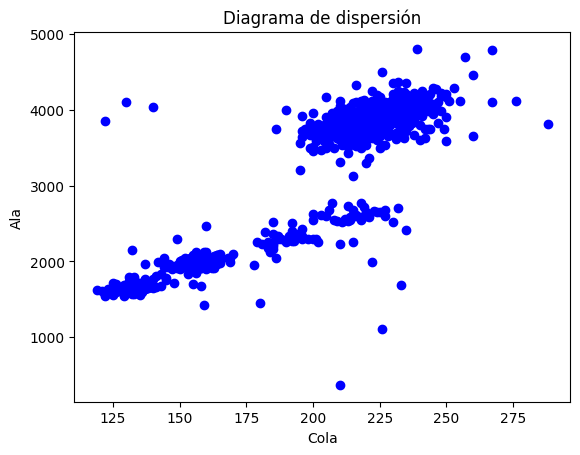

Coeficiente de correlación: 0.8998883674343952


In [4]:
# Diagrama de dispersión Cola vs Ala
plt.plot(data_hawks['Cola'], data_hawks['Ala'], 'ob')
plt.xlabel('Cola')
plt.ylabel('Ala')
plt.title('Diagrama de dispersión')
plt.show()

# Correlación entre ambas
correlacion1 = data_hawks['Cola'].corr(data_hawks['Ala'])
print("Coeficiente de correlación:", correlacion1)


### Tiene coeficiente de correlacion positivo de tipo fuerte

## b)
Complete el cuadro con los valores del atributo Hallux antes y después de normalizarlos utilizando media y desvío.

| **Medida** | **Sin Normalizar** | **Normalizado** |
|:----------:|:------------------:|:---------------:|
|   Máximo   |                    |                 |
|     Q1     |                    |                 |
|   Mínimo   |                    |                 |
|       Q2        |         | 
|       Q3        |         |     |
|       RIC       |         |   |
| Bigote Inferior |         |   |
| Bigote Superior |         |  |

In [5]:
NormalizedData_hawks = (data_hawks['Hallux'] - data_hawks['Hallux'].mean()) / data_hawks['Hallux'].std()
normal_max = data_hawks.max()
normalized_max = NormalizedData_hawks.max()
print("Valor máximo sin normalizar:", normal_max['Hallux'])
print("Valor máximo normalizado:", normalized_max)
normalized_min = NormalizedData_hawks.min()
normal_min = data_hawks.min()
print("Valor mínimo sin normalizar:", normal_min['Hallux'])
print("Valor mínimo normalizado:", normalized_min)
print("Q1 sin normalizar: ", data_hawks['Hallux'].quantile(0.25))
print("Q1 normalizado: ", NormalizedData_hawks.quantile(0.25))
print("Q2 sin normalizar: ", data_hawks['Hallux'].quantile(0.5))
print("Q2 normalizado: ", NormalizedData_hawks.quantile(0.5))
print("Q3 sin normalizar: ", data_hawks['Hallux'].quantile(0.75))
print("Q3 normalizado: ", NormalizedData_hawks.quantile(0.75))
normal_RIC = data_hawks['Hallux'].quantile(0.75) - data_hawks['Hallux'].quantile(0.25)
normalized_RIC = NormalizedData_hawks.quantile(0.75) - NormalizedData_hawks.quantile(0.25)
print("RIC sin normalizar: ", normal_RIC)
print("RIC normalizado: ", normalized_RIC)
Bigote_superior_normal = data_hawks['Hallux'].quantile(0.75) + 1.5 * normal_RIC
Bigote_superior_normalized = NormalizedData_hawks.quantile(0.75) + 1.5 * normalized_RIC
print("Bigote superior sin normalizar: ", Bigote_superior_normal)
print("Bigote superior normalizado: ", Bigote_superior_normalized)
Bigote_inferior_normal = data_hawks['Hallux'].quantile(0.25) - 1.5 * normal_RIC
Bigote_inferior_normalized = NormalizedData_hawks.quantile(0.25) - 1.5 * normalized_RIC
print("Bigote inferior sin normalizar: ", Bigote_inferior_normal)
print("Bigote inferior normalizado: ", Bigote_inferior_normalized)


Valor máximo sin normalizar: 3414
Valor máximo normalizado: 9.716759278095767
Valor mínimo sin normalizar: 95
Valor mínimo normalizado: -0.6123773075584721
Q1 sin normalizar:  152.0
Q1 normalizado:  -0.43498629057073734
Q2 sin normalizar:  295.0
Q2 normalizado:  0.01004731345112351
Q3 sin normalizar:  315.0
Q3 normalizado:  0.07228977555208307
RIC sin normalizar:  163.0
RIC normalizado:  0.5072760661228204
Bigote superior sin normalizar:  559.5
Bigote superior normalizado:  0.8332038747363136
Bigote inferior sin normalizar:  -92.5
Bigote inferior normalizado:  -1.1959003897549678


### I. Verdadero ya que el valor es cercano a 0
### II. Verdadero ya que el max_normalizado = 9.71
### III. Falso, deberia ser mayor a 804mm
### IV. Falso
### V. No, no es atipico, el bigote minimo normal llega a 92.5

# Ejercicio 2

In [6]:
data_globos = pd.read_csv(DATOS_DIR + "globos.csv",sep=",")
data_globos.dtypes
print(data_globos.columns.tolist())

['Color', 'Tamanio', 'Se_estira?', 'Edad', 'Inflado?']


In [7]:
#mapeo = {"Color": {"Amarillo": 0, "Rojo": 1}, "Se_estira?": {"No": 0, "Si": 1},
#"Edad": {"Adulto": 1, "Nene": 0}, "Tamanio": {"Chico": 0, "Grande": 1, "Mediano": 0.5}}

#data_globos.replace(mapeo, inplace=True)
# Color
NewColorColumn = pd.get_dummies(data_globos['Color'], prefix= 'Color', drop_first=True).astype(int)

data_globos = pd.concat([NewColorColumn, data_globos], axis=1)
data_globos.drop(['Color'],axis=1, inplace=True)


# Tamanio
tamanioMap ={
	"Tamanio": {
		"Chico": 0,
		"Mediano": 0.5,
		"Grande": 1
	}
}
data_globos.replace(tamanioMap, inplace=True)

# SeEstira?
NewSeEstiraColumn = pd.get_dummies(data_globos['Se_estira?'], prefix= 'Se_estira?', drop_first=True).astype(int)
data_globos = pd.concat([NewSeEstiraColumn, data_globos], axis=1)
data_globos.drop(['Se_estira?'],axis=1, inplace=True)

# Edad
NewEdadColumn = pd.get_dummies(data_globos['Edad'], prefix= 'Edad', drop_first=False).astype(int)
NewEdadColumn.drop('Edad_Nene', axis=1, inplace=True)
data_globos = pd.concat([NewEdadColumn, data_globos], axis=1)
data_globos.drop(['Edad'],axis=1, inplace=True)

# Inflado?: Si bien no lo pide lo voy a necesitar para entrenar el perceptron
NewInfladoColumn = pd.get_dummies(data_globos['Inflado?'], prefix= 'Inflado?', drop_first=True).astype(int)
data_globos = pd.concat([NewInfladoColumn, data_globos], axis=1)
data_globos.drop(['Inflado?'],axis=1, inplace=True)

data_globos

/tmp/ipykernel_2180/1068244996.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_globos.replace(tamanioMap, inplace=True)


,Inflado?_Si,Edad_Adulto,Se_estira?_Si,Color_Rojo,Tamanio
0,1,1,1,0,0.0
1,1,0,1,0,0.0
2,0,1,0,0,0.0
3,0,0,0,0,0.0
4,1,1,1,0,1.0
5,1,0,1,0,1.0
6,0,1,0,0,0.5
7,0,0,0,0,0.5
8,1,1,1,1,0.0
9,0,0,1,1,0.0


## a)
 Indique cuáles de los siguientes perceptrones pueden clasificar correctamente todos los ejemplos normalizados del archivo Globos.csv

| Configuración | w(Color) | w(Tamaño) | w(Se_estira?) | w(Edad) | b       |
|---------------|----------|-----------|---------------|---------|---------|
| Perceptrón 1  | 0.050    | 0.006     | -0.068        | -0.047  | 0.005   |
| Perceptrón 2  | -0.494   | -0.003    | 0.722         | 0.489   | -0.4943 |
| Perceptrón 3  | 0.060    | 0.004     | 0.1278        | 0.021   | -0.1132 |
| Perceptrón 4  | 0.296    | 0.026     | -0.576        | -0.287  | 0.371   |
| Perceptrón 5  | 0.994    | 0.006     | -1.466        | -0.989  | 0.988   |



In [8]:
perceptrons = [
    {
        "w_color": 0.050,
        "w_tamanio": 0.006,
        "w_se_estira": -0.068,
        "w_edad": -0.047,
        "b": 0.005
    },
    {
        "w_color": -0.494,
        "w_tamanio": -0.003,
        "w_se_estira": 0.722,
        "w_edad": 0.489,
        "b": -0.4943
    },
    {
        "w_color": 0.06,
        "w_tamanio": 0.004,
        "w_se_estira": 0.1278,
        "w_edad": 0.021,
        "b": -0.1132
    },
    {
        "w_color": 0.296,
        "w_tamanio": 0.026,
        "w_se_estira": -0.576,
        "w_edad": -0.287,
        "b": 0.371
    },
    {
        "w_color": 0.994,
        "w_tamanio": 0.006,
        "w_se_estira": -1.466,
        "w_edad": -0.989,
        "b": 0.988
    }
]

for i, p in enumerate(perceptrons):
    incorrect = 0
    for idx, row in data_globos.iterrows():
        z = (p["w_color"] * row["Color_Rojo"] +
			p["w_tamanio"] * row["Tamanio"] +
			p["w_se_estira"] * row["Se_estira?_Si"] +
			p["w_edad"] * row["Edad_Adulto"] -
			p["b"])
        a = 1 if (z >= 0) else 0
        data_globos.at[idx, f'Perceptron_{i+1}'] = a
        if a != row["Inflado?_Si"]:
            incorrect += 1
    print(f"Perceptron {i+1}: {incorrect} errores de {len(data_globos)} ejemplos.")

# Ninguno clasifica todo correctamente, pero el que menos errores tiene es el perceptron 4 con 6 errores.

Perceptron 1: 10 errores de 16 ejemplos.
Perceptron 2: 8 errores de 16 ejemplos.
Perceptron 3: 10 errores de 16 ejemplos.
Perceptron 4: 6 errores de 16 ejemplos.
Perceptron 5: 8 errores de 16 ejemplos.


## b)
### Los peores perceptrones son el 1 y el 3

# Ejercicio 3

## a)
 La Tabla 1 muestra información correspondiente de pacientes para determinar si deben realizarse un examen médico en función de su edad, altura y riesgo médico.
| EDAD | RIESGO | EXAMEN |
|------|--------|--------|
| 55   | ALTO   | SI     |
| 56   | MEDIO  | NO     |
| 58   | MEDIO  | SI     |
| 56   | BAJO   | NO     |
| 59   | BAJO   | SI     |
| 57   | MEDIO  | SI     |
| 60   | BAJO   | SI     |
| 53   | ALTO   | NO     |
| 59   | MEDIO  | SI     |

 Luego de la numerización se calculó el coeficiente de correlación lineal entre los atributos EDAD y RIESGO y se obtuvo como resultado -0.71. ¿Cómo debe interpretarse este valor?
### Rta: Este valor se puede interpretar como que a medida que la edad aumenta el riesgo disminuye, siguiendo una relación lineal débil.

## b)
 Luego de numerizar el atributo RIESGO y de normalizar los atributos de manera lineal entre 0 y 1, los ejemplos fueron utilizados para entrenar un perceptrón capaz de predecir correctamente el atributo EXAMEN. Los pesos obtenidos fueron los siguientes:

### W(EDAD) = 0.0807 W(RIESGO) = 0.074 Sesgo o bias = -0.0742

 ¿Cuál será la respuesta del perceptrón para los siguientes valores?

### (EDAD, RIESGO) = (50, BAJO), (51, MEDIO), (54, ALTO)

In [9]:
perceptron = {
	"w_edad": 0.0807,
	"w_riesgo": -0.074,
	"bias": -0.0742
}
ejemplos = [
    {"Edad": 51, "Riesgo": 2},
    {"Edad": 50, "Riesgo": 1},
    {"Edad": 54, "Riesgo": 3}
]
for ej in ejemplos:
    z = (perceptron["w_edad"] * ej["Edad"] +
            perceptron["w_riesgo"] * ej["Riesgo"] +
            perceptron["bias"])
    a = 1 if (z >= 0) else 0
    print(f"Para (Edad={ej['Edad']}, Riesgo={ej['Riesgo']}) => EXAMEN = {a}")

Para (Edad=51, Riesgo=2) => EXAMEN = 1
Para (Edad=50, Riesgo=1) => EXAMEN = 1
Para (Edad=54, Riesgo=3) => EXAMEN = 1


# Ejercicio 4

## a)
Utilice el archivo *drug_train.csv* para entrenar un perceptrón que sea capaz de predecir si el tipo de
fármaco que se debe administrar a un paciente afectado de rinitis alérgica es el habitual (suministro de DrugY) o no.

In [10]:
data_drugs_train = pd.read_csv(DATOS_DIR + "drugs_train.csv",sep=",")
data_drugs_train.dtypes
print(data_drugs_train.columns.tolist())

['Age', 'Sex', 'BP', 'Cholesterol', 'Na', 'K', 'Drug']


In [11]:
def label_encoding_preprocess_data(data: pd.DataFrame) -> pd.DataFrame:
    data = data.copy()  # Evita modificar el DataFrame original

    # Codificación one-hot para 'Sex'
    NewSexColumn = pd.get_dummies(
        data['Sex'], prefix='Sex', drop_first=True
    ).astype(int)
    data = pd.concat([NewSexColumn, data], axis=1)
    data.drop(['Sex'], axis=1, inplace=True)

    # Mapeo de valores para BP y Cholesterol
    Mapeo = {
        "BP": {"LOW": 0, "NORMAL": 1, "HIGH": 2},
        "Cholesterol": {"NORMAL": 0, "HIGH": 1}
    }
    data.replace(Mapeo, inplace=True)

    return data

# Preprocesar datos
preprocessed_data = label_encoding_preprocess_data(data_drugs_train)

# Preparar datos para el Perceptrón
X_train = preprocessed_data[['Age', 'Sex_M', 'BP', 'Cholesterol']].values
Y_train = (preprocessed_data["Drug"] == "drugY").astype(int)

# Entrenar Perceptrón
ppn = Perceptron(alpha=0.05, n_iter=100, random_state=1)
ppn.fit(X_train, Y_train)

print(f"Pesos: {ppn.w_}, Bias: {ppn.b_}")

Pesos: [  2.467022   -12.97967551  -1.69988563   1.80233257], Bias: 14.946755890817192


/tmp/ipykernel_2180/1992735514.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(Mapeo, inplace=True)


## b) 
Luego utilice el archivo drug_test.csv para medir la calidad del modelo.

In [12]:
data_drugs_test = pd.read_csv(DATOS_DIR + "drugs_test.csv",sep=",")
data_drugs_test.dtypes
preprocessed_test_data = label_encoding_preprocess_data(data_drugs_test)
X_test = preprocessed_test_data[['Age', 'Sex_M', 'BP', 'Cholesterol']].values
Y = ppn.predict(X_test)
T_test = (preprocessed_test_data["Drug"] == "drugY").astype(int)
efectividad = 100.0*np.sum(Y==T_test)/len(Y)
print(f"Efectividad del perceptrón en el conjunto de prueba: {efectividad:.2f}%")

Efectividad del perceptrón en el conjunto de prueba: 45.00%


/tmp/ipykernel_2180/1992735514.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(Mapeo, inplace=True)


## c)
Resuelva el problema:

● Numerizando los atributos ordinales utilizando dos representaciones diferentes: como entero único
y de manera binaria (dummy).

● Normalizando de diferentes formas: Sin normalizar, normalización lineal, normalización con media y
desvío

### Numerizacion como entero (mapeo)

In [13]:
#la numerizacion entera la hice en el inciso anterior 
#Normalizacion lineal
X_train_lin = (X_train - X_train.min(axis=0)) / (X_train.max(axis=0) - X_train.min(axis=0))
X_test_lin = (X_test - X_train.min(axis=0)) / (X_train.max(axis=0) - X_train.min(axis=0))
ppn.fit(X_train_lin, Y_train)
Y_lin = ppn.predict(X_test_lin)
efectividad_lin = 100.0*np.sum(Y_lin==T_test)/len(Y_lin)
print(f"Efectividad del perceptrón con normalización lineal en el conjunto de prueba: {efectividad_lin:.2f}%")

# Normalización con media y desvío
X_train_std = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
X_test_std = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)
ppn.fit(X_train_std, Y_train)
Y_std = ppn.predict(X_test_std)
efectividad_std = 100.0*np.sum(Y_std==T_test)/len(Y_std)
print(f"Efectividad del perceptrón con normalización media y desvío en el conjunto de prueba: {efectividad_std:.2f}%")

Efectividad del perceptrón con normalización lineal en el conjunto de prueba: 45.00%
Efectividad del perceptrón con normalización media y desvío en el conjunto de prueba: 42.50%


### Numerizacion de manera binaria

In [14]:
def one_hot_preprocess_data(train: pd.DataFrame, test: pd.DataFrame):
    data = pd.concat([train, test], axis=0)  # unir filas
    categorical_cols = ['Sex', 'BP', 'Cholesterol']
    dummies = pd.get_dummies(data[categorical_cols], drop_first=False).astype(int)
    data = data.drop(columns=categorical_cols)
    data = pd.concat([dummies, data], axis=1)

    # separar nuevamente en train y test
    train_oh = data.iloc[:len(train), :].copy()
    test_oh  = data.iloc[len(train):, :].copy()
    return train_oh, test_oh

train_data_oh, test_data_oh = one_hot_preprocess_data(data_drugs_train, data_drugs_test)

# --- Definir X y T ---
X_train = train_data_oh.drop(columns=['Drug']).values
Y_train = (train_data_oh["Drug"] == "drugY").astype(int)

X_test = test_data_oh.drop(columns=['Drug']).values
T_test = (test_data_oh["Drug"] == "drugY").astype(int)

ppn = Perceptron(alpha=0.05, n_iter=100, random_state=1)

#Sin normalizar
ppn.fit(X_train, Y_train)
Y = ppn.predict(X_test)
efectividad = 100.0*np.sum(Y==T_test)/len(Y)
print(f"Efectividad del perceptrón sin normalizar en el conjunto de prueba: {efectividad:.2f}%")

#normalización lineal
X_train_lin = (X_train - X_train.min(axis=0)) / (X_train.max(axis=0) - X_train.min(axis=0))
X_test_lin = (X_test - X_train.min(axis=0)) / (X_train.max(axis=0) - X_train.min(axis=0))
ppn.fit(X_train_lin, Y_train)
Y_lin = ppn.predict(X_test_lin)
efectividad_lin = 100.0*np.sum(Y_lin==T_test)/len(Y_lin)
print(f"Efectividad del perceptrón con normalización lineal en el conjunto de prueba: {efectividad_lin:.2f}%")

# Normalización con media y desvío
X_train_std = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
X_test_std = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)
ppn.fit(X_train_std, Y_train)
Y_std = ppn.predict(X_test_std)
efectividad_std = 100.0*np.sum(Y_std==T_test)/len(Y_std)
print(f"Efectividad del perceptrón con normalización media y desvío en el conjunto de prueba: {efectividad_std:.2f}%")

Efectividad del perceptrón sin normalizar en el conjunto de prueba: 45.00%
Efectividad del perceptrón con normalización lineal en el conjunto de prueba: 97.50%
Efectividad del perceptrón con normalización media y desvío en el conjunto de prueba: 95.00%


# Ejercicio 5
Ejercicio 5
El archivo semillas.csv contiene información de granos que pertenecen a tres variedades diferentes de trigo:
Kama, Rosa y Canadiense. El total es de 210 ejemplos a razón de 70 ejemplos para cada tipo de grano,
seleccionados al azar para el experimento. La información registrada corresponde al resultado de la
visualización de alta calidad de la estructura interna del núcleo efectuada utilizando una técnica de rayos X
blandos. Este tipo de estudio no es destructivo y es considerablemente más económico que otras técnicas
de imagen más sofisticadas como la microscopía de barrido o la tecnología láser. Las imágenes se grabaron
en placas KODAK de rayos x de 13x18 cm. Los estudios se realizaron utilizando granos de trigo cosechados
combinados procedentes de campos experimentales, explorados en el Instituto de Agrofísica de la Academia
Polaca de Ciencias en Lublin. Para construir los datos, se midieron siete parámetros geométricos de cada
grano de trigo:

● área A

● perímetro P

● compacidad C = 4 * pi * A / P ^ 2

● longitud del núcleo

● ancho del núcleo

● coeficiente de asimetría

● longitud del surco del núcleo

A partir de los 210 ejemplos, luego de normalizarlos utilizando los valores de media y desvío, se logró entrenar
un perceptrón capaz de identificar, con una precisión del 100%, uno de los tres tipos de semillas. Para realizar
el entrenamiento se utilizó una velocidad de aprendizaje de 0.05 y un máximo de 200 iteraciones. Indique
cuál es el tipo de semilla que puede ser reconocido correctamente por un perceptrón.


In [15]:
from sklearn.linear_model import Perceptron

# === Cargar datos ===
data_semillas = pd.read_csv(DATOS_DIR + "semillas.csv", sep=",")
ALPHA = 0.05
N_ITER = 200

# Mapeo de valores para la columna 'Clase'
mapeo = {"Clase": {"Tipo1": 1, "Tipo2": 2, "Tipo3": 3}}
data_semillas.replace(mapeo, inplace=True)

# Normalización media y desvío de todos los atributos
X = data_semillas.drop(columns=['Clase']).values
T = data_semillas['Clase'].values
X_std = (X - X.mean(axis=0)) / X.std(axis=0)

# === One-vs-All con 3 perceptrones ===
perceptrones = {}
for clase in [1, 2, 3]:
    y_bin = (T == clase).astype(int)  # 1 si es la clase actual, 0 si no
    ppn = Perceptron(alpha=ALPHA, max_iter=N_ITER, random_state=1)
    ppn.fit(X_std, y_bin)
    perceptrones[clase] = ppn

# === Predicciones combinadas ===
# Obtenemos la decisión de cada perceptrón
scores = np.column_stack([perceptrones[c].decision_function(X_std) for c in [1,2,3]])

# La clase predicha es la del perceptrón con mayor score
Y_pred = np.argmax(scores, axis=1) + 1  # +1 porque argmax devuelve índices [0,1,2]

print("El tipo de semilla predicho para cada muestra es:")

## la suma de aciertos para cada tipo de semilla
for clase in [1, 2, 3]:
    total_clase = np.sum(T == clase)
    aciertos_clase = np.sum((Y_pred == clase) & (T == clase))
    aciertos_totales = np.sum(Y_pred == clase)
    print(f"Tipo {clase}: {aciertos_clase} aciertos de {total_clase} muestras.")
     

for clase in [1, 2, 3]:
    y_bin = (T == clase).astype(int)
    Y = perceptrones[clase].predict(X_std)
    print(f"Correct predictions for Tipo{clase}: {np.sum(Y == y_bin)}")
    


El tipo de semilla predicho para cada muestra es:
Tipo 1: 56 aciertos de 70 muestras.
Tipo 2: 70 aciertos de 70 muestras.
Tipo 3: 68 aciertos de 70 muestras.
Correct predictions for Tipo1: 194
Correct predictions for Tipo2: 205
Correct predictions for Tipo3: 200


/tmp/ipykernel_2180/994102876.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_semillas.replace(mapeo, inplace=True)


# Ejercicio 6
El archivo `zoo.csv` contiene información de 101 animales caracterizados por los siguientes atributos:

- **A1. Nombre del animal**
- **A2. Tiene Pelo**
- **A3. Plumas**
- **A4. Huevos**
- **A5. Leche**
- **A6. Vuela**
- **A7. Acuático**
- **A8. Depredador**
- **A9. Dentado**
- **A10. Vertebrado**
- **A11. Branquias**
- **A12. Venenoso**
- **A13. Aletas**
- **A14. Patas** (número de patas del animal)
- **A15. Cola**
- **A16. Doméstico**
- **A17. Tamaño gato**
- **A18. Clase**

Salvo los atributos **A1** y **A18** que contienen texto, y el **A14** que contiene el número de patas del animal, el resto toma el valor **1** si el animal posee la característica y **0** si no.

Hay 7 valores de clase posibles (atributo **A18**):

- mamífero
- ave
- pez
- invertebrado
- insecto
- reptil

In [16]:
data_zoo = pd.read_csv(DATOS_DIR + "zoo.csv", sep=",", encoding="latin1")
data_zoo.dtypes
print(data_zoo.columns.tolist())

['animal', 'Tiene_Pelo', 'Tiene_Plumas', 'Nace_de_huevo', 'Toma_Leche', 'Vuela', 'Acuatico', 'Depredador', 'Dentado', 'Vertebrado', 'Respira', 'Venenoso', 'Tiene_Aletas', 'Cant_Patas', 'Tiene_Cola', 'Domestico', 'Tamano_Gato', 'Clase']


## a)
Realice un gráfico que visualice de la cantidad de ejemplos por cada valor del atributo clase y analice
que tipos de problema podrían surgir al entrenar un modelo para clasificación.

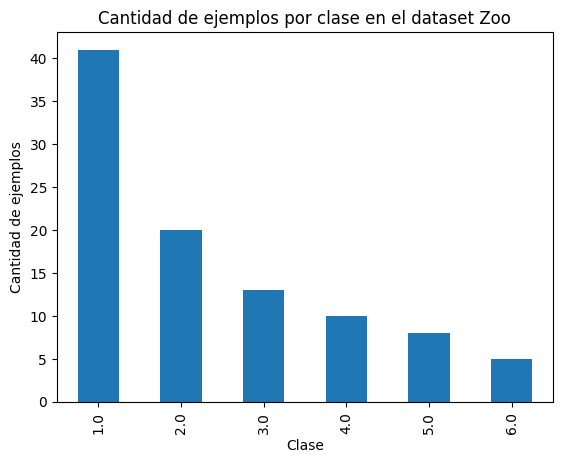

In [17]:
mapeo = {"Clase" : {"Mamifero": 1, "Ave": 2, "Reptil": 6, "Pez": 3, "Insecto": 5, "Invertebrado": 4}}
data_zoo.replace(mapeo, inplace=True)

#Grafico de barras con la cantidad de ejemplos por cada valor del atributo clase
# Asegura que todos los valores sean enteros
data_zoo['Clase'] = pd.to_numeric(data_zoo['Clase'], errors='coerce')

# Grafico de barras con la cantidad de ejemplos por cada valor del atributo clase
barra = data_zoo['Clase'].value_counts().sort_index()
barra.plot(kind='bar')

plt.xlabel('Clase')
plt.ylabel('Cantidad de ejemplos')
plt.title('Cantidad de ejemplos por clase en el dataset Zoo')
plt.show()


Hay pocos ejemplos de animales que no sean mamiferos

## b)
Utilice todos los ejemplos para entrenar un perceptrón que sea capaz de reconocer si un animal es un
mamífero. Entrene varias veces si es necesario y verifique que funcione correctamente.

In [27]:
# Elimino columnas que no son numéricas
X = data_zoo.drop(columns=['Clase', 'animal']).values   # o el nombre real de la columna con strings
T = data_zoo['Clase'].values

# Defino el target binario: mamíferos (Clase == 1)
Y = (T == 1).astype(int)

ppn = Perceptron(alpha=0.05, max_iter=200, random_state=1)
ppn.fit(X, Y)

Y_pred = ppn.predict(X)
efectividad = 100.0 * np.sum(Y_pred == Y) / len(Y_pred)
print(f"Efectividad del perceptrón en el conjunto de datos completo: {efectividad:.2f}%")



Efectividad del perceptrón en el conjunto de datos completo: 100.00%


## c)
Observe los pesos del perceptrón entrenado en b) ¿Puede determinar cuáles son las características más relevantes para decidir si se trata de un mamífero o no? 
Realice varias ejecuciones independientes y
observe si las características más relevantes siguen siendo las mismas.

In [29]:
# Pesos de perceptron (usando sklearn)
for i, peso in enumerate(ppn.coef_[0]):
    print(f"Peso w{i+1}: {peso:.4f}")

Peso w1: 8.0000
Peso w2: -2.0000
Peso w3: -7.0000
Peso w4: 8.0000
Peso w5: -2.0000
Peso w6: -2.0000
Peso w7: -2.0000
Peso w8: 2.0000
Peso w9: 0.0000
Peso w10: 1.0000
Peso w11: -2.0000
Peso w12: -1.0000
Peso w13: 0.0000
Peso w14: -1.0000
Peso w15: -1.0000
Peso w16: 5.0000


### Se puede ver que variables como 'Tiene_Pelo', 'Leche', 'Tamanio_gato' son muy relevantes para averiguar si un animal es mamifero o no

## d) e) Repita b) y c) para las aves. Repita b) y c) para los reptiles.

No gracias

# Ejercicio 7

In [30]:
data_autos = pd.read_csv(DATOS_DIR + "automobile-simple.csv", sep=",")
data_autos.dtypes
print(data_autos.columns.tolist())

['make', 'fuel-type', 'num-of-doors', 'body-style', 'curb-weight', 'engine-size', 'horsepower', 'city-mpg', 'highway-mpg', 'price', 'volume', 'eco-rating']


El archivo `automobile_simple.csv` contiene 11 atributos de automóviles de un total de 205 registros. Es una versión modificada y simplificada del dataset disponible en el repositorio UCI:  
https://archive.ics.uci.edu/ml/datasets/Automobile

A continuación se presenta una breve descripción de los atributos que contiene el archivo y que caracterizan a cada vehículo:

| **Atributo**     | **Descripción**                                                        |
|------------------|------------------------------------------------------------------------|
| **make**         | Marca: alfa-romero, audi, bmw, chevrolet…                              |
| **fuel-type**    | Tipo de combustible: diesel, gasolina.                                 |
| **num-of-doors** | Número de puertas: cuatro, dos.                                        |
| **body-style**   | Tipo de carrocería: techo duro, wagon, sedán, hatchback, descapotable. |
| **curb-weight**  | Peso en vacío: numérico de 1488 a 4066.                                |
| **engine-size**  | Tamaño del motor: numérico de 61 a 326.                                |
| **horsepower**   | Potencia: numérico de 48 a 288.                                        |
| **city-mpg**     | Rendimiento en ciudad (en millas por galón): numérico de 13 a 49.      |
| **highway-mpg**  | Rendimiento en ruta (en millas por galón): numérico de 16 a 54.        |
| **price**        | Precio en USD: numérico de 5118 a 45400.                               |
| **volume**       | Volumen del vehículo (alto x ancho x alto).                            |
| **eco-rating**    | Evaluación de la sostenibilidad ambiental del vehículo basado en su volumen, peso, consumo de combustible y

## a)
Para cada atributo indique si es Discreto, Continuo, Nominal u Ordinal.

| **Atributo**     | **Tipo** |
|------------------|----------|
| **make**         | Ordinal  |
| **fuel-type**    | Nominal  |
| **num-of-doors** | Discreto |
| **body-style**   | Nominal  |
| **curb-weight**  | Discreto |
| **engine-size**  | Discreto |
| **horsepower**   | Discreto |
| **city-mpg**     | Discreto |
| **highway-mpg**  | Discreto |
| **price**        | Discreto |
| **volume**       | Continuo |
| **eco-rating**   | Continuo |

# b) 
Elimine los registros que presenten valores faltantes.


In [37]:
missing_values_count = data_autos.isnull().sum()
print(missing_values_count)

#Eliminamos los registros con valores faltantes
data_autos_cleaned = data_autos.dropna()
print(f"Registros después de eliminar valores faltantes: {len(data_autos_cleaned)}")


make            0
fuel-type       0
num-of-doors    2
body-style      0
curb-weight     0
engine-size     0
horsepower      2
city-mpg        0
highway-mpg     0
price           4
volume          0
eco-rating      0
dtype: int64
Registros después de eliminar valores faltantes: 197


## c) 
Calcule la matriz de correlación usando los atributos numéricos.

             curb-weight  engine-size  horsepower  city-mpg  highway-mpg  \
curb-weight     1.000000     0.848932    0.759925 -0.755559    -0.800113   
engine-size     0.848932     1.000000    0.825286 -0.655737    -0.684662   
horsepower      0.759925     0.825286    1.000000 -0.821960    -0.803658   
city-mpg       -0.755559    -0.655737   -0.821960  1.000000     0.972407   
highway-mpg    -0.800113    -0.684662   -0.803658  0.972407     1.000000   
price           0.834732     0.873708    0.811953 -0.692948    -0.708659   
volume          0.822823     0.592571    0.449278 -0.554978    -0.608072   
eco-rating     -0.842957    -0.723965   -0.839619  0.976650     0.984258   

                price    volume  eco-rating  
curb-weight  0.834732  0.822823   -0.842957  
engine-size  0.873708  0.592571   -0.723965  
horsepower   0.811953  0.449278   -0.839619  
city-mpg    -0.692948 -0.554978    0.976650  
highway-mpg -0.708659 -0.608072    0.984258  
price        1.000000  0.631578   -0.74

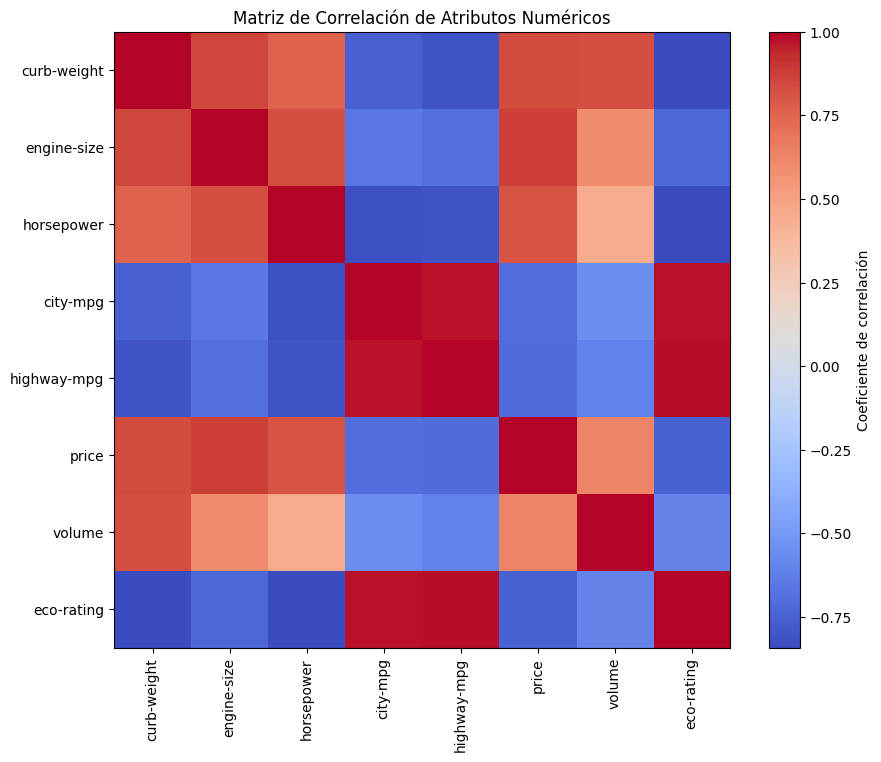

In [42]:
#Matriz de correlación ignorando atributos no numéricos
correlation_matrix = data_autos_cleaned.drop(columns=['make', 'fuel-type', 'num-of-doors', 'body-style']).corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Coeficiente de correlación')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Matriz de Correlación de Atributos Numéricos')
plt.show()

## d) 
 Entrenamiento de un perceptrón para clasificar autos ecológicos

Siga los siguientes pasos:

**I. Generación del atributo binario**
- Utilice el atributo `eco-rating` para crear un nuevo atributo binario que determine si un auto es ecológico o no.
- Un auto es considerado ecológico si el valor de `eco-rating` supera la media de dicho atributo.

**II. Comparación de modelos con diferentes normalizaciones**
- Genere y compare 3 modelos utilizando las siguientes normalizaciones:
  - Sin normalizar
  - Normalización lineal (min-max)
  - Normalización estándar (media y desvío)

**III. Análisis eliminando atributos correlacionados**
- Utilizando la matriz de correlación calculada en el punto c), repita el punto II) eliminando dos atributos fuertemente correlacionados (uno con correlación positiva y otro con correlación negativa).
- Compare y reflexione sobre los resultados obtenidos.

In [51]:
#I
eco_rating_mean = data_autos_cleaned['eco-rating'].mean()
print(f"Valor promedio de 'eco-rating': {eco_rating_mean}")
es_ecologico = (data_autos_cleaned['eco-rating'] > eco_rating_mean).astype(int)
data_autos_cleaned['Es_Ecologico'] = es_ecologico

#II
#Entrenamiento perceptron sin normalizar
X = data_autos_cleaned.drop(columns=['eco-rating', 'Es_Ecologico', 'make', 'fuel-type', 'num-of-doors', 'body-style']).values
T = data_autos_cleaned['Es_Ecologico'].values
ppn = Perceptron(alpha=0.05, max_iter=200, random_state=1)
ppn.fit(X, T)
Y = ppn.predict(X)
efectividad = 100.0 * np.sum(Y == T) / len(Y)
print(f"Efectividad del perceptrón sin normalizar: {efectividad:.2f}%")

#Entrenamiento perceptron con normalización lineal
X_lin = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
ppn.fit(X_lin, T)
Y_lin = ppn.predict(X_lin)
efectividad_lin = 100.0 * np.sum(Y_lin == T) / len(Y_lin)
print(f"Efectividad del perceptrón con normalización lineal: {efectividad_lin:.2f}%")

#Entrenamiento perceptron con normalización media y desvío
X_std = (X - X.mean(axis=0)) / X.std(axis=0)
ppn.fit(X_std, T)
Y_std = ppn.predict(X_std)
efectividad_std = 100.0 * np.sum(Y_std == T) / len(Y_std)
print(f"Efectividad del perceptrón con normalización media y desvío: {efectividad_std:.2f}%")

Valor promedio de 'eco-rating': 42.09494272062433
Efectividad del perceptrón sin normalizar: 52.79%
Efectividad del perceptrón con normalización lineal: 95.94%
Efectividad del perceptrón con normalización media y desvío: 100.00%


/tmp/ipykernel_2180/2232691633.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_autos_cleaned['Es_Ecologico'] = es_ecologico
